In [11]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF

from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel


In [12]:
df = pd.read_csv("preprocessed_imdb.csv")

tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")
tfidf_matrix = joblib.load("tfidf_matrix.pkl")


In [13]:
texts = [text.split() for text in df['clean_text']]
dictionary = Dictionary(texts)

feature_names = tfidf_vectorizer.get_feature_names_out()


In [14]:
def nmf_coherence(k):
    nmf = NMF(
        n_components=k,
        random_state=42,
        init="nndsvd",
        max_iter=2000
    )

    nmf.fit(tfidf_matrix)
    H = nmf.components_

    topics = []
    for topic in H:
        top_words = [feature_names[i] for i in topic.argsort()[-10:]]
        topics.append(top_words)

    cm = CoherenceModel(
        topics=topics,
        texts=texts,
        dictionary=dictionary,
        coherence="c_v"
    )

    return cm.get_coherence()


In [15]:
topic_range = range(2, 22)
coherence_scores = []

for k in topic_range:
    score = nmf_coherence(k)
    coherence_scores.append(score)
    print(f"Topics: {k}, Coherence: {score:.4f}")


Topics: 2, Coherence: 0.4184
Topics: 3, Coherence: 0.4618
Topics: 4, Coherence: 0.4677
Topics: 5, Coherence: 0.4835
Topics: 6, Coherence: 0.4947
Topics: 7, Coherence: 0.5192
Topics: 8, Coherence: 0.5105
Topics: 9, Coherence: 0.5191
Topics: 10, Coherence: 0.5196
Topics: 11, Coherence: 0.5315
Topics: 12, Coherence: 0.5480
Topics: 13, Coherence: 0.5322
Topics: 14, Coherence: 0.5281
Topics: 15, Coherence: 0.5345
Topics: 16, Coherence: 0.5291
Topics: 17, Coherence: 0.5230
Topics: 18, Coherence: 0.5360
Topics: 19, Coherence: 0.5399
Topics: 20, Coherence: 0.5376
Topics: 21, Coherence: 0.5396


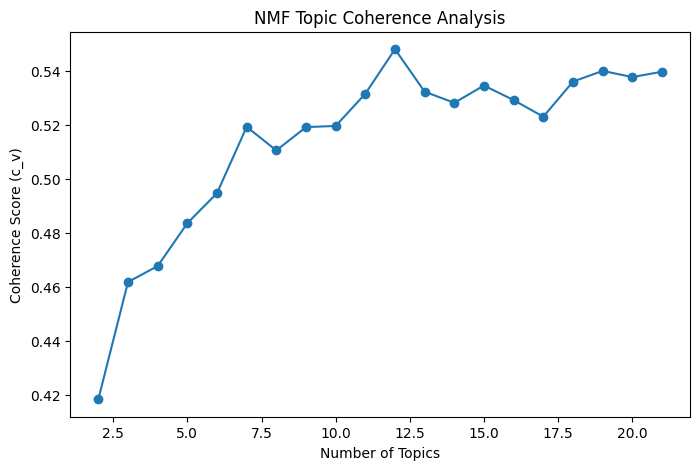

In [16]:
plt.figure(figsize=(8,5))
plt.plot(topic_range, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("NMF Topic Coherence Analysis")
plt.show()


In [17]:
best_k = topic_range[np.argmax(coherence_scores)]
best_score = max(coherence_scores)

print("Best number of topics:", best_k)
print("Best coherence score:", best_score)


Best number of topics: 12
Best coherence score: 0.5479642637211496


In [18]:
final_nmf = NMF(
    n_components=best_k,
    random_state=42,
    init="nndsvd",
    max_iter=2000
)

W_final = final_nmf.fit_transform(tfidf_matrix)


In [19]:
from sklearn.decomposition import NMF
import joblib

final_nmf = NMF(
    n_components=best_k,
    random_state=42,
    init="nndsvd",
    max_iter=1500
)

W_final = final_nmf.fit_transform(tfidf_matrix)


In [23]:
for idx, topic in enumerate(final_nmf.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-6:]]
    print(f"Topic {idx}: {', '.join(top_words)}")


Topic 0: something, go, guy, think, know, people
Topic 1: awful, script, terrible, bad acting, acting, bad
Topic 2: television, tv, season, series, episode, show
Topic 3: job, performance, best, actor, good, great
Topic 4: worst ever, movie, ever seen, worst, seen, ever
Topic 5: interesting, main character, plot, main, story, character
Topic 6: role, work, performance, director, war, film
Topic 7: old, dvd, saw, first, year, time
Topic 8: hilarious, humor, joke, laugh, comedy, funny
Topic 9: child, woman, story, family, life, love
Topic 10: budget, special, gore, effect, zombie, horror
Topic 11: adaptation, version, novel, read book, read, book


In [27]:
topic_names = {
    0: "Opinions",
    1: "Bad Acting",
    2: "TV Shows",
    3: "Performance",
    4: "Worst Movies",
    5: "Story & Plot",
    6: "Film Work",
    7: "Memories",
    8: "Comedy",
    9: "Family",
    10: "Horror",
    11: "Adaptations"
}


In [28]:
for topic_id, words in enumerate(final_nmf.components_):
    name = topic_names.get(topic_id, f"Topic {topic_id}")
    print(f"\n{topic_id} – {name}")



0 – Opinions

1 – Bad Acting

2 – TV Shows

3 – Performance

4 – Worst Movies

5 – Story & Plot

6 – Film Work

7 – Memories

8 – Comedy

9 – Family

10 – Horror

11 – Adaptations


In [29]:
joblib.dump(final_nmf, "nmf_topic_model.pkl")


['nmf_topic_model.pkl']